## Business Understanding

Diabetes, a metabolic disorders, if left untreated, can cause many complications for many patients. 
Cardiovascular disease, stroke, and chronic kidney are among the serious long-term complications.
The purpose of this study is to build a machine learning models to accurately predict whether the patients in the dataset have diabetes or not? 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
It is important to mote that all patients in this dataset are females at least 21 years old of Pima Indian heritage.


### About the dataset:
The datasets includes several predictor variables and one target variable. Variables are as follows;
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

## Importing Required Libraries

In [185]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

## Exploratory Data Analysis

In [186]:
df = pd.read_csv("../input/diabets/diabetes.csv")

In [187]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [188]:
df.shape

(768, 9)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [190]:
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

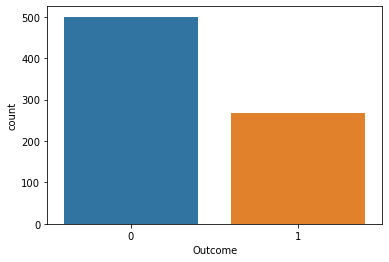

In [191]:
sns.countplot(x = 'Outcome', data = df);


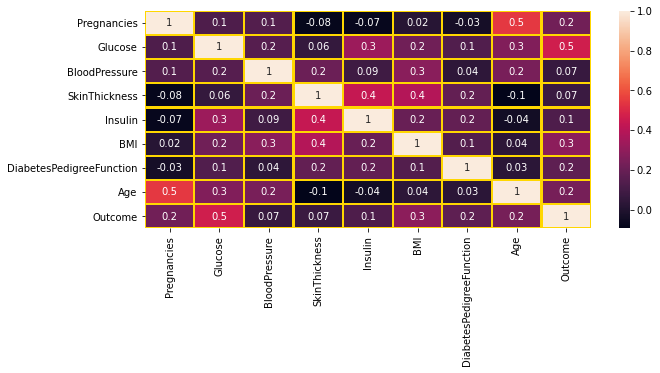

In [192]:
plt.figure(figsize = (10,4)) 
sns.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True,);

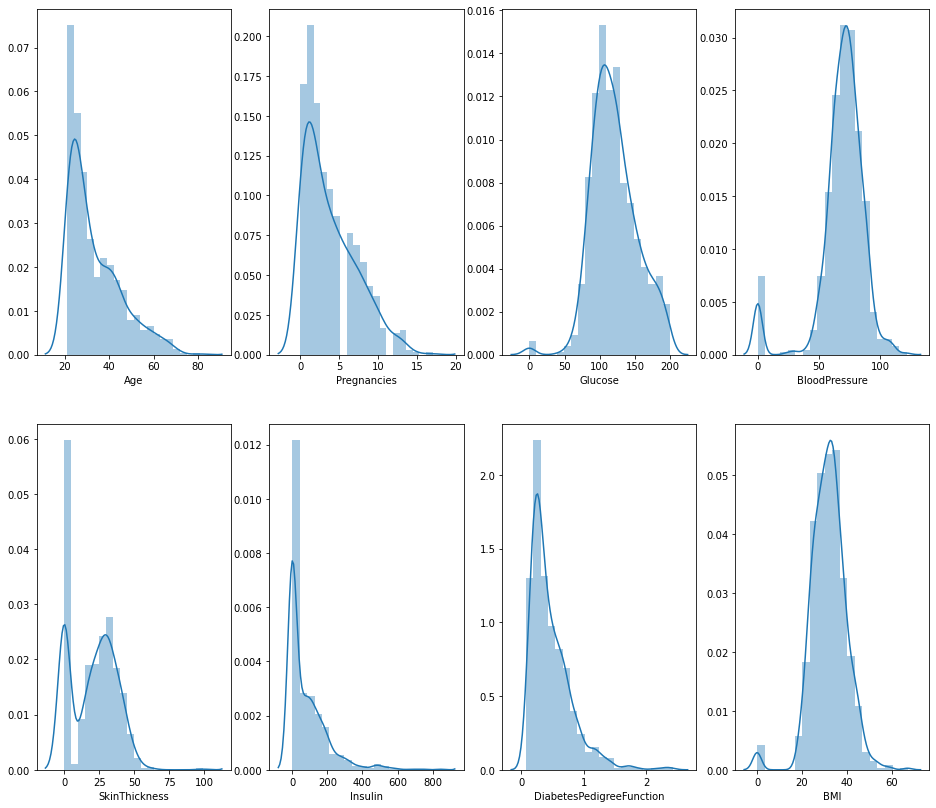

In [193]:
fig, ax = plt.subplots(2,4, figsize=(16,14))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[0,2]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[0,3]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[1,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[1,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[1,2]) 
sns.distplot(df.BMI, bins = 20, ax=ax[1,3]);

In [194]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [195]:
print(df.groupby("Outcome").agg({"Pregnancies":"mean"}))
print(df.groupby("Outcome").agg({"Age":"mean"}))

         Pregnancies
Outcome             
0           3.298000
1           4.865672
               Age
Outcome           
0        31.190000
1        37.067164


In [196]:
print(df.groupby("Outcome").agg({"Insulin": "mean"}))
print(df.groupby("Outcome").agg({"Glucose": "mean"}))

            Insulin
Outcome            
0         68.792000
1        100.335821
            Glucose
Outcome            
0        109.980000
1        141.257463


## Data Preprocessing

In [197]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [198]:
# Since some variables have min value of zero, which is not possible, changed these with the NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [199]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [200]:
df['Glucose'] = df['Glucose'].fillna((df['Glucose'].mean()))
df['BloodPressure'] = df['BloodPressure'].fillna((df['BloodPressure'].mean()))
df['SkinThickness'] = df['SkinThickness'].fillna((df['SkinThickness'].mean()))
df['Insulin'] = df['Insulin'].fillna((df['Insulin'].mean()))
df['BMI'] = df['BMI'].fillna((df['BMI'].mean()))

In [201]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [202]:
for feature in df:
    
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,": yes")
    else:
        print(feature, ": no")

Pregnancies : no
Glucose : no
BloodPressure : no
SkinThickness : yes
Insulin : yes
BMI : no
DiabetesPedigreeFunction : no
Age : no
Outcome : no


In [203]:
Q1 = df["Insulin"].quantile(0.05)
Q3 = df["Insulin"].quantile(0.95)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR

df[df["Insulin"] > upper]
df.loc[df["Insulin"] > upper, "Insulin"] = upper

In [204]:
Q1 = df["SkinThickness"].quantile(0.05)
Q3 = df["SkinThickness"].quantile(0.95)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR

df[df["SkinThickness"] > upper]
df.loc[df["SkinThickness"] > upper, "SkinThickness"] = upper

In [205]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.000000,6.000000,9.0000,10.00000,13.00000,17.000
Glucose,768.0,121.686763,30.435949,44.000,86.700,99.75000,117.000000,140.250000,167.0000,181.00000,196.00000,199.000
BloodPressure,768.0,72.405184,12.096346,24.000,58.000,64.00000,72.202592,80.000000,88.0000,90.00000,106.00000,122.000
SkinThickness,768.0,29.139715,8.689533,7.000,18.000,25.00000,29.153420,32.000000,40.0000,44.00000,51.33000,88.475
Insulin,768.0,155.160854,82.354770,14.000,67.000,121.50000,155.548223,155.548223,210.0000,293.00000,519.90000,657.500
BMI,768.0,32.457464,6.875151,18.200,24.000,27.50000,32.400000,36.600000,41.5000,44.39500,50.75900,67.100
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.372500,0.626250,0.8786,1.13285,1.69833,2.420
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.000000,41.000000,51.0000,58.00000,67.00000,81.000
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.000000,1.000000,1.0000,1.00000,1.00000,1.000


## MODEL DEVELOPMENT

In [206]:
y=df["Outcome"]
x=df.drop("Outcome", axis=1)

### BASE MODEL DEVELOPMENT

LR: 0.769515 (0.034311)
KNN: 0.712252 (0.038628)
CART: 0.670608 (0.049272)
RF: 0.761688 (0.061497)
XGB: 0.756562 (0.050550)
LightGBM: 0.739645 (0.034615)


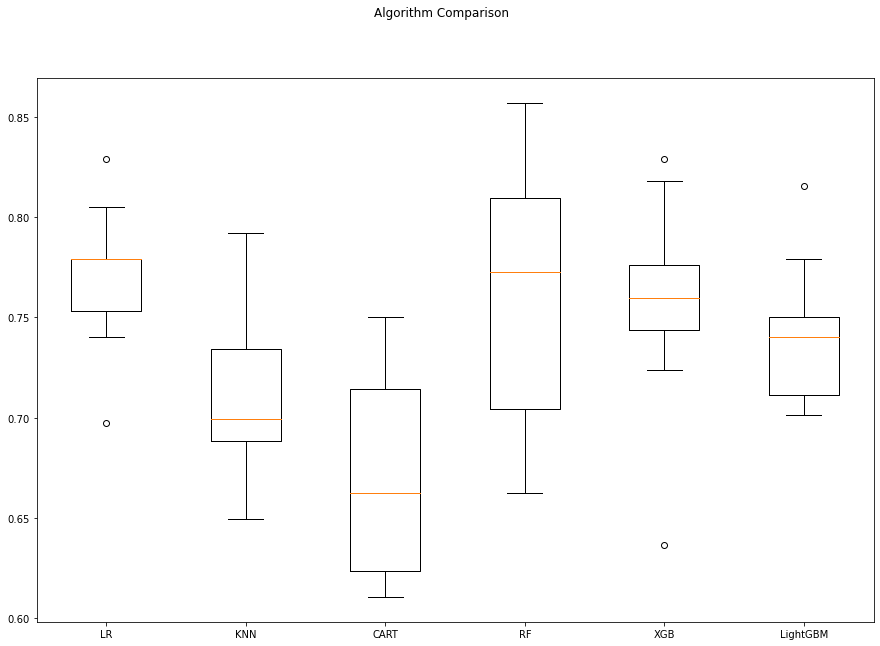

In [207]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, x, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### MODEL TUNING

#### KNN MODEL

In [208]:
knn_model = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(2,30,1)}
knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(x,y)
knn_cv_model.best_params_

{'n_neighbors': 12}

In [209]:
knn_model_tuned = KNeighborsClassifier(n_neighbors = 12).fit(x,y)
cross_val_score(knn_model_tuned, x, y, cv = 10).mean()

0.7461722488038277

#### RANDOM FORESTS MODEL

In [210]:
rf_model = RandomForestClassifier(random_state = 12345)
rf_params = {"n_estimators" :[100,200], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,3,4,5,20],
            "max_depth": [3,5,8,None]}
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(x,y)
gs_cv.best_params_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.8min finished


{'max_depth': 8,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [211]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_).fit(x,y)
cross_val_score(rf_tuned, x, y, cv = 10).mean()

0.7617053998632947

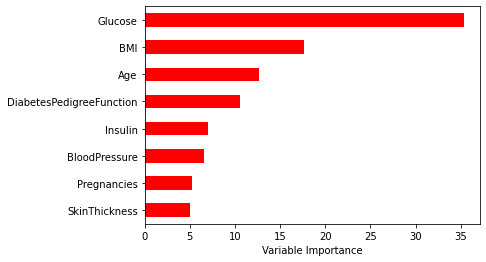

In [212]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = x.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

#### LIGHT GBM

In [213]:
lgbm = LGBMClassifier(random_state = 12345)
lgbm_params = {"learning_rate": [0.01, 0.02, 0.03],
              "n_estimators": [1000, 1500, 2000],
              "max_depth":[8,9,10,12,15]}
gs_cv = GridSearchCV(lgbm, 
                    lgbm_params, 
                     cv = 5, 
                     n_jobs = -1, 
                     verbose = 2).fit(x,y)
gs_cv.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  1.4min finished


{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}

In [214]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(x,y)
cross_val_score(lgbm_tuned, x, y, cv = 10).mean()

0.7409603554340397

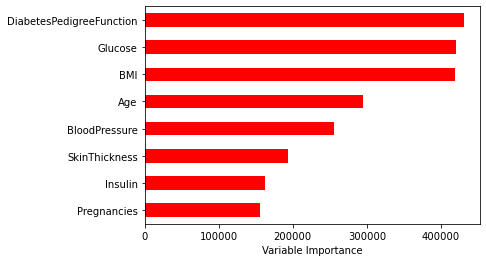

In [215]:
Importance = pd.DataFrame({'Importance':lgbm_tuned.feature_importances_*100}, 
                          index = x.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

#### SUPPORT VECTOR MACHINES (SVM)

In [216]:
svr_model = SVC(random_state = 12345) 
svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1,5, 10, 100, 500]}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10, n_jobs = -1, verbose =  2).fit(x,y)
svr_cv_model.best_params_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.5s finished


{'C': 10}

In [217]:
svr_tuned = SVC(C = 100, random_state = 12345).fit(x, y)
cross_val_score(svr_tuned, x, y, cv = 10).mean()

0.75

#### XGBOOST

In [218]:
xgb = GradientBoostingClassifier(random_state = 12345)
xgb_params = {
    "learning_rate": [0.01, 0.1],
    "min_samples_split": np.linspace(0.1, 0.3),
    "max_depth":[2,3],
    "subsample":[0.5, 0.9],
    "n_estimators": [100,200]}
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(x, y)
xgb_cv_model.best_params_


Fitting 10 folds for each of 800 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 |

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 0.2061224489795918,
 'n_estimators': 200,
 'subsample': 0.5}

In [219]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(x,y)
cross_val_score(xgb_tuned, x, y, cv = 10).mean()

0.7513157894736843

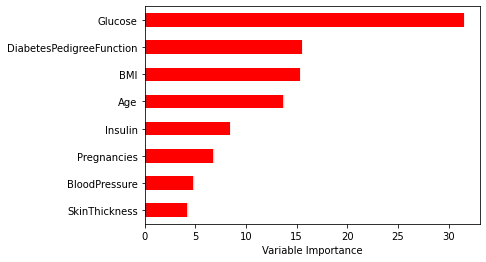

In [220]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100}, 
                          index = x.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## COMPARISON OF FINAL MODELS

RF: 0.769498 (0.055347)
LightGBM: 0.747420 (0.051614)
XGB: 0.772163 (0.050305)


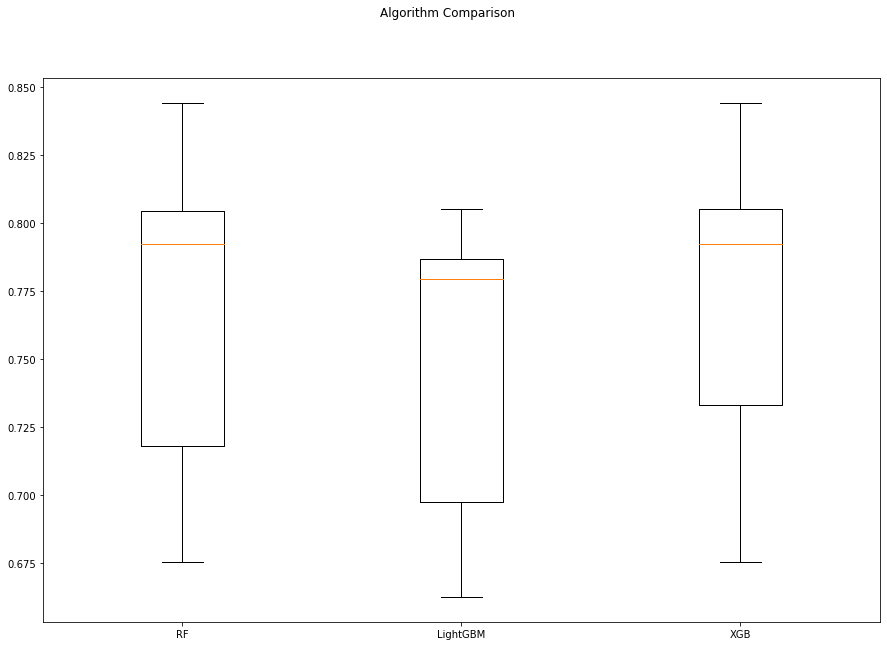

In [224]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 5, min_samples_split = 2, n_estimators = 100)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 10, n_estimators = 1000)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 3, min_samples_split = 0.2, n_estimators = 200, subsample = 0.5)))

results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, x, y, cv = kfold, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()